In [42]:
import pandas as pd
import seaborn as sns
import scikit_posthocs as sp

In [30]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [31]:
df = pd.read_csv("AZ_PPB.csv")

In [32]:
df.head()

,canonical_smiles,molregno,standard_relation,standard_value,standard_units
0,CC(C)(C(=O)c1cccnc1)c2cccnc2,86284,NaN,11.18,%
1,CN(CC(=O)O)NC(=O)C[C@H](N)C[C@@H](O)CN,127808,NaN,12.63,%
2,OC(Cn1cncn1)(Cn2cncn2)c3ccc(F)cc3F,13758,NaN,14.23,%
3,CCN(CC)CCNC(=O)c1ccc(NS(=O)(=O)C)cc1,160578,NaN,15.10,%
4,COc1ccc(cc1)C(CN(C)C)C2(O)CCCCC2,27278,NaN,18.64,%


In [33]:
chg_df = pd.read_csv("AZ_PPB_charge.csv")

In [34]:
chg_df.head()

,NAME,ACIDIC,BASIC,STATE_10,STATE_50,STATE_90
0,86284,NaN,4.87,neutral,neutral,neutral
1,127808,4.02,9.69,zwiterionic,zwiterionic,zwiterionic
2,13758,12.68,2.30,neutral,neutral,neutral
3,160578,8.69,9.29,basic,basic,basic
4,27278,14.42,8.91,basic,basic,basic


In [35]:
combo_df = df.merge(chg_df,left_on="molregno",right_on="NAME")

In [36]:
combo_df.head()

,canonical_smiles,molregno,standard_relation,standard_value,standard_units,NAME,ACIDIC,BASIC,STATE_10,STATE_50,STATE_90
0,CC(C)(C(=O)c1cccnc1)c2cccnc2,86284,NaN,11.18,%,86284,NaN,4.87,neutral,neutral,neutral
1,CN(CC(=O)O)NC(=O)C[C@H](N)C[C@@H](O)CN,127808,NaN,12.63,%,127808,4.02,9.69,zwiterionic,zwiterionic,zwiterionic
2,OC(Cn1cncn1)(Cn2cncn2)c3ccc(F)cc3F,13758,NaN,14.23,%,13758,12.68,2.30,neutral,neutral,neutral
3,CCN(CC)CCNC(=O)c1ccc(NS(=O)(=O)C)cc1,160578,NaN,15.10,%,160578,8.69,9.29,basic,basic,basic
4,COc1ccc(cc1)C(CN(C)C)C2(O)CCCCC2,27278,NaN,18.64,%,27278,14.42,8.91,basic,basic,basic


In [37]:
ab_order = ["acidic","basic","neutral","zwiterionic"]
ab_pal = ["pink","lightblue","lightgreen","violet"]

[Text(0, 0.5, '%Bound in Human Plasma'), Text(0.5, 0, 'Charge State')]

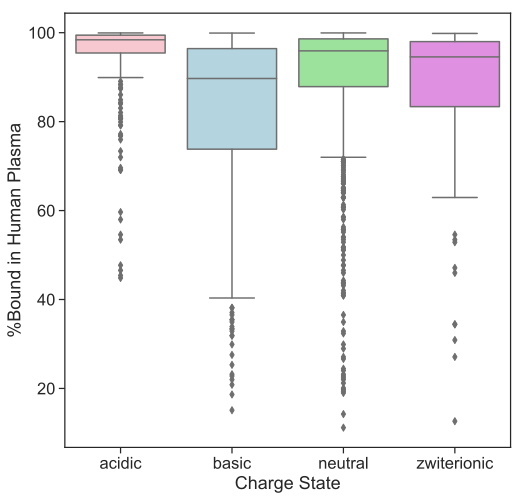

In [39]:
sns.set(rc={'figure.figsize':(8,8)},font_scale=1.5)
sns.set_style('ticks')
ax = sns.boxplot(x="STATE_50",y="standard_value",data=combo_df,order=ab_order,palette=ab_pal)
ax.set(xlabel="Charge State",ylabel="%Bound in Human Plasma")

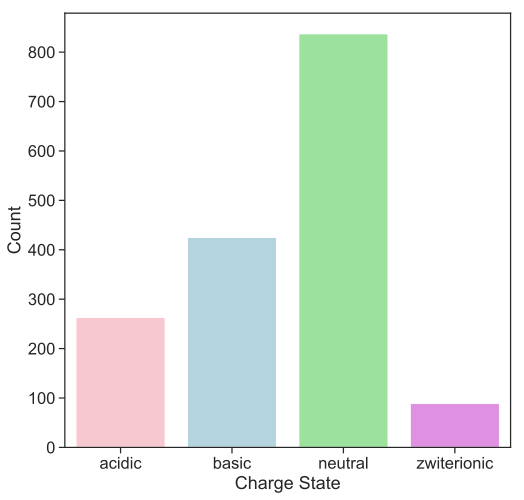

In [40]:
ax = sns.countplot(combo_df.STATE_50,order=ab_order,palette=ab_pal)
_ = ax.set(xlabel="Charge State", ylabel="Count")

In [15]:
combo_df.shape

(1614, 11)

(<matplotlib.axes._subplots.AxesSubplot at 0x115330780>,
 <matplotlib.colorbar.ColorbarBase at 0x115c8f1d0>)

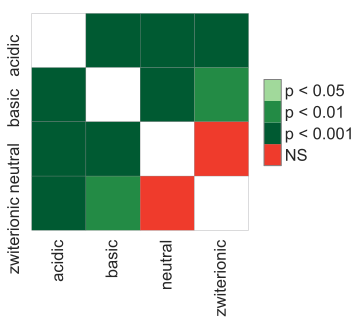

In [44]:
sns.set(rc={'figure.figsize':(6,4)},font_scale=1.5)
pc = sp.posthoc_mannwhitney(combo_df,val_col="standard_value",group_col="STATE_50",p_adjust='holm')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)